In [1]:
import pandas as pd
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
weather = pd.read_csv('weather_features.csv',header='infer')


C:\Users\anilo\AppData\Local\Temp\ipykernel_6580\1207209929.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv('weather_features.csv',header='infer')


In [3]:
#Pre-processign REMOVE INNECESARY DATA --> temp_max, temp_min, weather_id, weather_icon,
weather = weather.drop(columns=['weather_id', 'weather_icon'], axis = 1)
weather

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_main,weather_description
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,clear,sky is clear
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,clear,sky is clear
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,clear,sky is clear
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,clear,sky is clear
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,clear,sky is clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.76,287.15,288.15,1028,54,3,30,0.0,0.0,0.0,0,clear,sky is clear
178392,2018-12-31 20:00:00+01:00,Seville,285.76,285.15,286.15,1029,62,3,30,0.0,0.0,0.0,0,clear,sky is clear
178393,2018-12-31 21:00:00+01:00,Seville,285.15,285.15,285.15,1028,58,4,50,0.0,0.0,0.0,0,clear,sky is clear
178394,2018-12-31 22:00:00+01:00,Seville,284.15,284.15,284.15,1029,57,4,60,0.0,0.0,0.0,0,clear,sky is clear


In [4]:
df = pd.DataFrame(weather)

In [5]:
#REDONDEAR y CAMBIAR A CELSIUS
df['temp'] = df['temp'] - 273.15
df['temp'] = df['temp'].round(1)
print(df)

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [ ]:
#DIRECCION DEL AIRE

limites = [0, 45, 90, 135, 180, 225, 270, 315, 360]
etiquetas = ['N', 'NW', 'W', 'SW', 'S', 'SO', 'O', 'NO']  # Etiquetas para cada intervalo

# Utilizar pd.cut() para asignar etiquetas a los intervalos
df['wind_deg'] = pd.cut(df['wind_deg'], bins=limites, labels=etiquetas, right=False)



In [ ]:
#RENAME
df.rename(columns={'wind_deg': 'wind_dir'}, inplace=True)
# Mostrar el DataFrame con la nueva columna de direcciones
print(df)

                           dt_iso city_name  temp  temp_min  temp_max  \
0       2015-01-01 00:00:00+01:00  Valencia  -2.7   270.475   270.475   
1       2015-01-01 01:00:00+01:00  Valencia  -2.7   270.475   270.475   
2       2015-01-01 02:00:00+01:00  Valencia  -3.5   269.686   269.686   
3       2015-01-01 03:00:00+01:00  Valencia  -3.5   269.686   269.686   
4       2015-01-01 04:00:00+01:00  Valencia  -3.5   269.686   269.686   
...                           ...       ...   ...       ...       ...   
178391  2018-12-31 19:00:00+01:00   Seville  14.6   287.150   288.150   
178392  2018-12-31 20:00:00+01:00   Seville  12.6   285.150   286.150   
178393  2018-12-31 21:00:00+01:00   Seville  12.0   285.150   285.150   
178394  2018-12-31 22:00:00+01:00   Seville  11.0   284.150   284.150   
178395  2018-12-31 23:00:00+01:00   Seville  10.8   282.150   285.150   

        pressure  humidity  wind_speed wind_dir  rain_1h  rain_3h  snow_3h  \
0           1001        77           1       

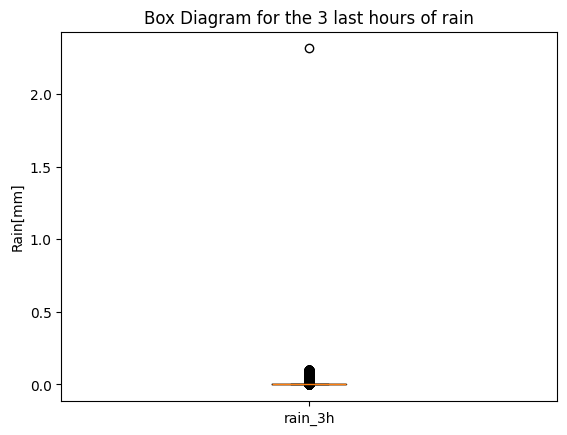

In [ ]:
# Crear el diagrama de caja
fig, ax = plt.subplots()
ax.boxplot(df['rain_3h'])

# Agregar etiquetas y título
ax.set_xticklabels(['rain_3h'])
ax.set_ylabel('Rain[mm]')
ax.set_title('Box Diagram for the 3 last hours of rain')

# Mostrar el diagrama de caja
plt.show()

c:\Python\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='temp', ylabel='temp_min'>

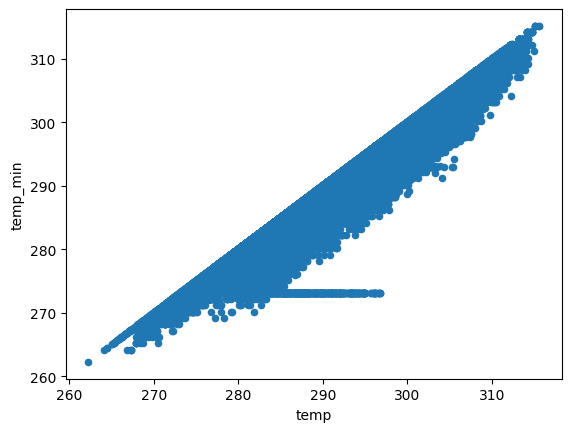

In [ ]:
weather.plot.scatter(x='temp',y='temp_min', c=)

K - Means method:
K-means is a clustering algorithm that searches for k centroids (k being the number of clusters) that are, at most, at a certain distance from every point inside the cluster. It is very sensitive to parameters of different dimension size and, because of that, we will normalize all the values.

agrupar datos en k grupos distintos basados en características similares. busca encontrar k grupos que minimicen la variación interna dentro de cada grupo y maximicen la variación entre los diferentes grupos. -->

Inicialización: Comienza con la selección aleatoria de k centroides (puntos centrales de los clusters).

Asignación: Asigna cada dato al centroide más cercano, formando k grupos.

Actualización del centroide: Calcula nuevos centroides para cada grupo tomando la media de todos los puntos asignados a ese grupo.

Repetición: Itera los pasos 2 y 3 hasta que los centroides ya no cambien significativamente o se alcance un número predefinido de iteraciones.

In [ ]:
kmeans_data = data

kmeans_data['mean_temp'] = kmeans_data['mean_temp']/kmeans_data['mean_temp'].abs().max()
kmeans_data['min_temp'] = kmeans_data['min_temp']/kmeans_data['min_temp'].abs().max()
kmeans_data['max_temp'] = kmeans_data['max_temp']/kmeans_data['max_temp'].abs().max()
kmeans_data['sea_level'] = kmeans_data['sea_level']/kmeans_data['sea_level'].abs().max()
kmeans_data['pressure'] = kmeans_data['pressure']/kmeans_data['pressure'].abs().max()
kmeans_data['dew_point'] = kmeans_data['dew_point']/kmeans_data['dew_point'].abs().max()
kmeans_data['wind_speed'] = kmeans_data['wind_speed']/kmeans_data['wind_speed'].abs().max()
kmeans_data['precipitation'] = kmeans_data['precipitation']/kmeans_data['precipitation'].abs().max()

kmeans_data


In [ ]:
from sklearn import cluster

#K-means just work on relevant features
data_cluster = data.drop('Place',axis=1) #Elimina columna Place

# Calculation 6 clusters
k_means = cluster.KMeans(n_clusters=7, max_iter=20, random_state=1) #Se configura el algoritmo: identificar 7 grupos, 20 nº max. de iteraciones, random_state=1 establece una semilla aleatoria para la reproducibilidad de los resultados. 
k_means.fit(data_cluster) # Ajusta el modelo K-means

labels = k_means.labels_ #Etiqueta
pd.DataFrame(labels, index=data.Place, columns=['Cluster ID']) #utilizando estas etiquetas, indexando las filas con los valores de la columna 'Place' del conjunto de datos original y etiquetando la columna como 'Cluster ID'.